# Tutorial sulle API di twitter
## In questo notebook è presente un breve tutorial sull'uso delle API di twitter.

> #### Informazioni studente/corso
>
> - **Nome**: Samuele Maria
> - **Cognome**: Gallina
> - **Matricola**: 100001478
> - **Corso**: Social Media Management
> - **Anno accademico**: 2021/2022

Il presente notebook ovviamente non contiene tutte le informazioni riguardanti le API di Twitter. <br>
Per approfondimenti visitare le docs ufficiali https://developer.twitter.com/en/docs <br>
Per vedere esempi molto esaustivi di chiamate alle API il sito stesso di Twitter mette a disposizione il link a questa repository di GitHub https://github.com/twitterdev/Twitter-API-v2-sample-code

### Il primo step è sicuramente ottenere l'accesso alle API 
Ovviamente bisogna possedere un account Twitter normale prima di procedere.
Se non c'è l'account già a disposizione bisogna crearlo(come se si fosse un semplicissimo utente)


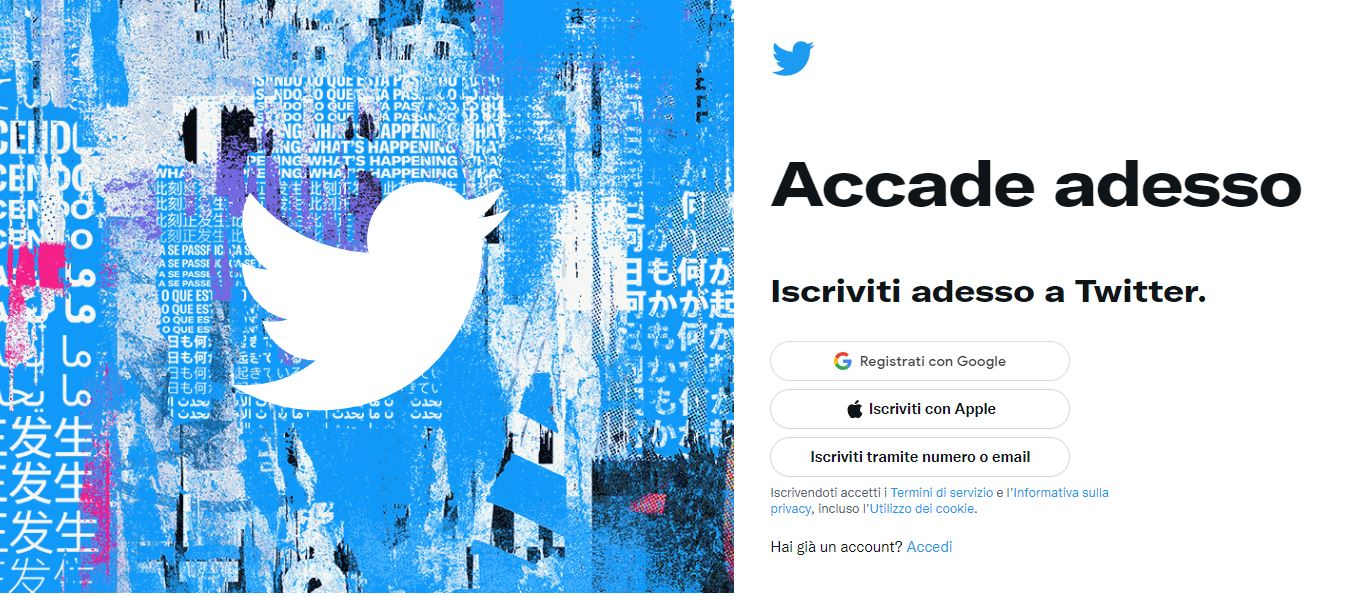

Ottenuto l'account procediamo cercando sul nostro motore di ricerca "twitter developer" uno dei primi risultati(probabilmente il primo) sarà il sito a cui dovremo accedere.
Dovrebbe comparire qualcosa del tipo:
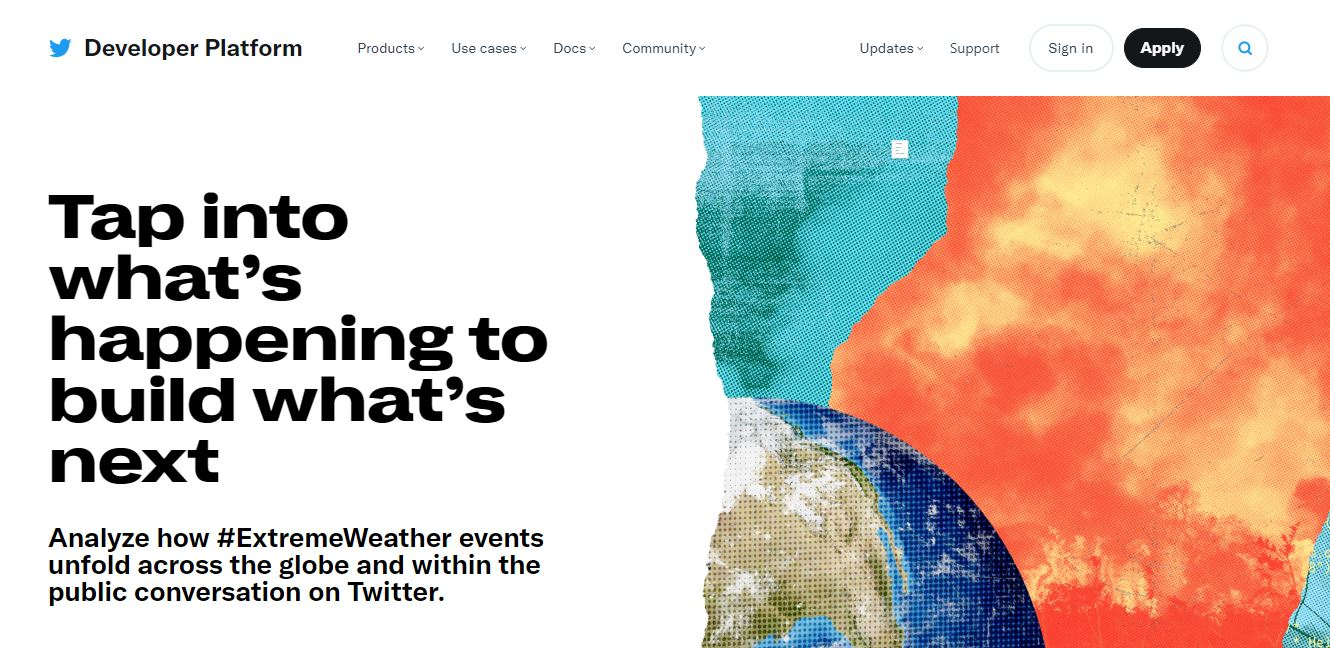

Clicchiamo "Apply" in alto a destra: ci porterà in una sezione per "convertire" il nostro profilo in un account developer(quindi con accesso alle API)
Probabilmente saranno richieste le credenziali.
Dopo questa procedura arriviamo a dei passaggi guidati per l'ottenimento del profilo developer

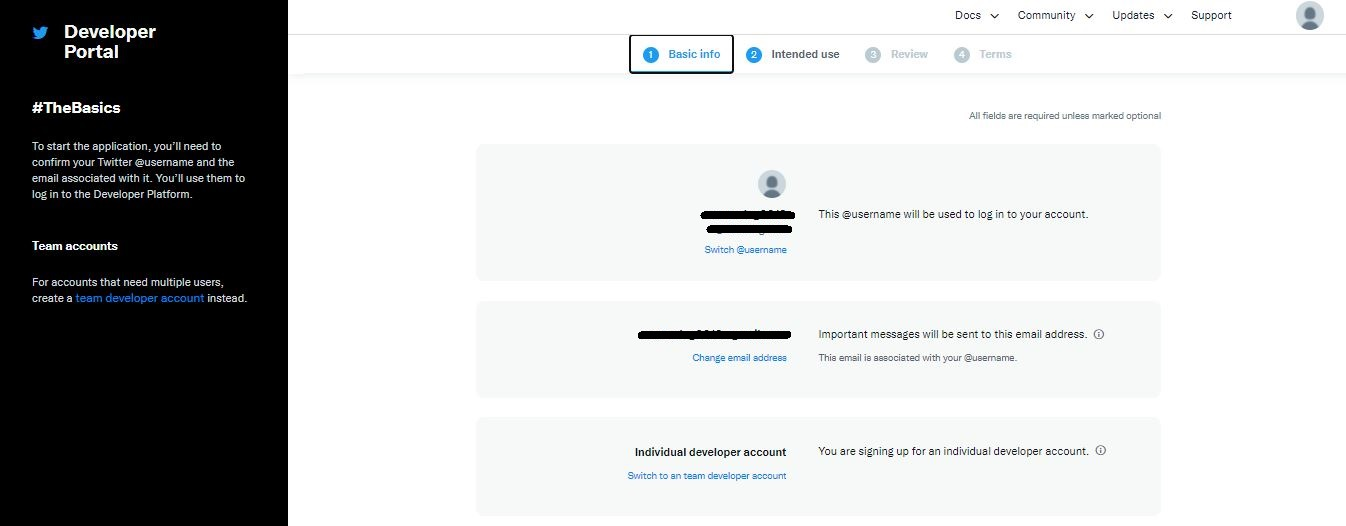

Lo step2 di questa sezione sarà molto laborioso in quanto si dovrà spiegare per bene i motivi per cui vogliamo ottenere le API.
Molti social media fanno attenzione a queste cose quindi meglio essere più espressivi possibile e dare quanti più dettagli possiamo.
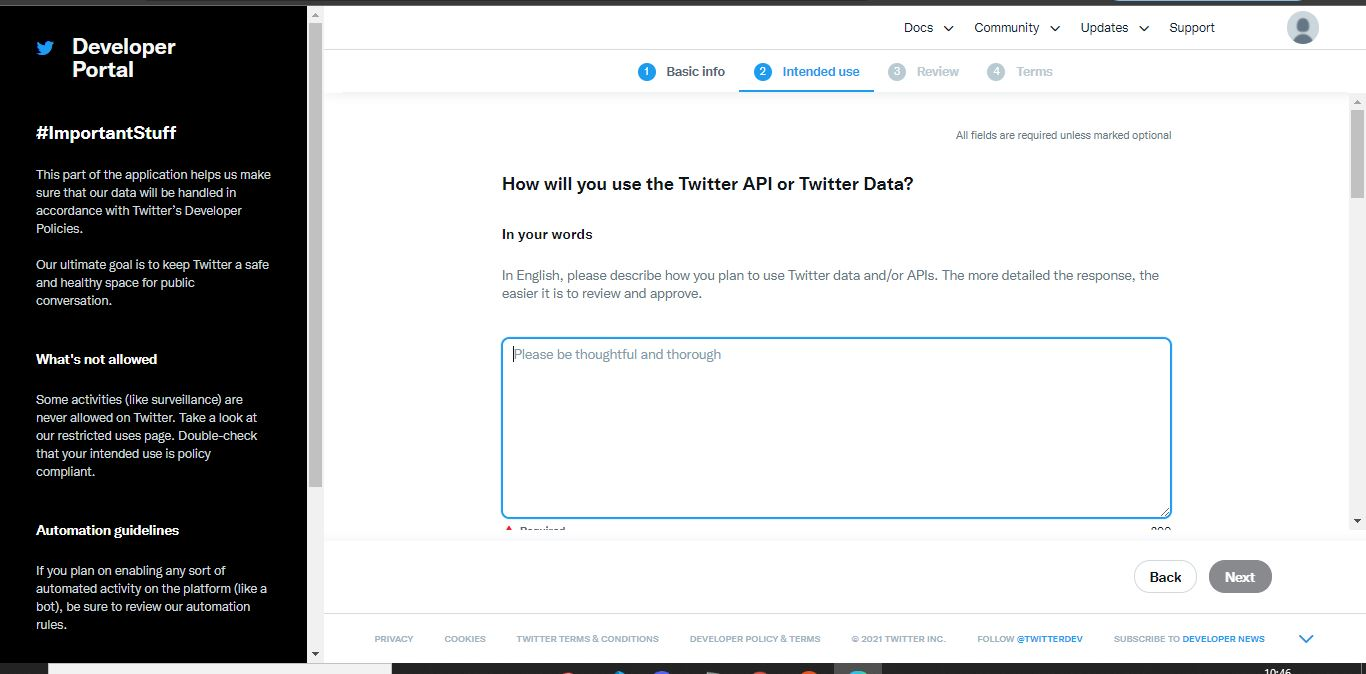
La prima delle varie domande è la seguente(poi ne seguono altre in cui ognuno risponde come è opportuno per lui)

Lo step3 sarà una semplice review per rivedere meglio le informazioni che abbiamo inserito(per modificarle eventualmente).
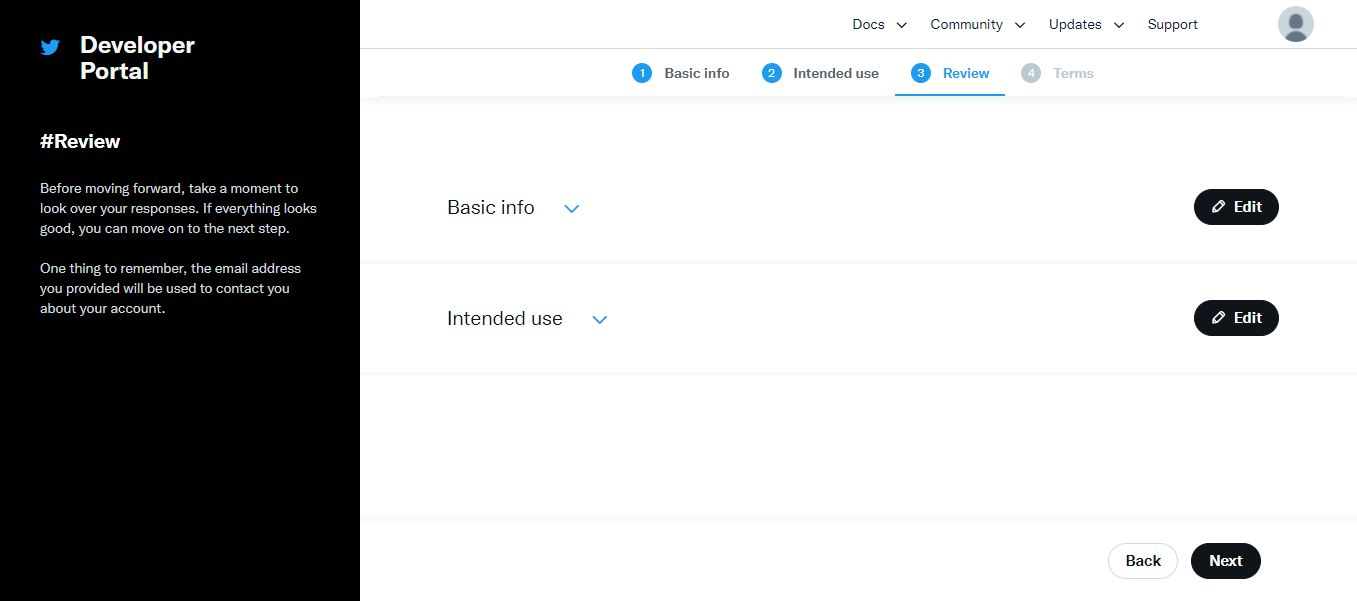

Nello step4 come ogni social media che si rispetti ci sarà un documento con termini legali da acconsentire(sarebbe opportuno leggerlo)
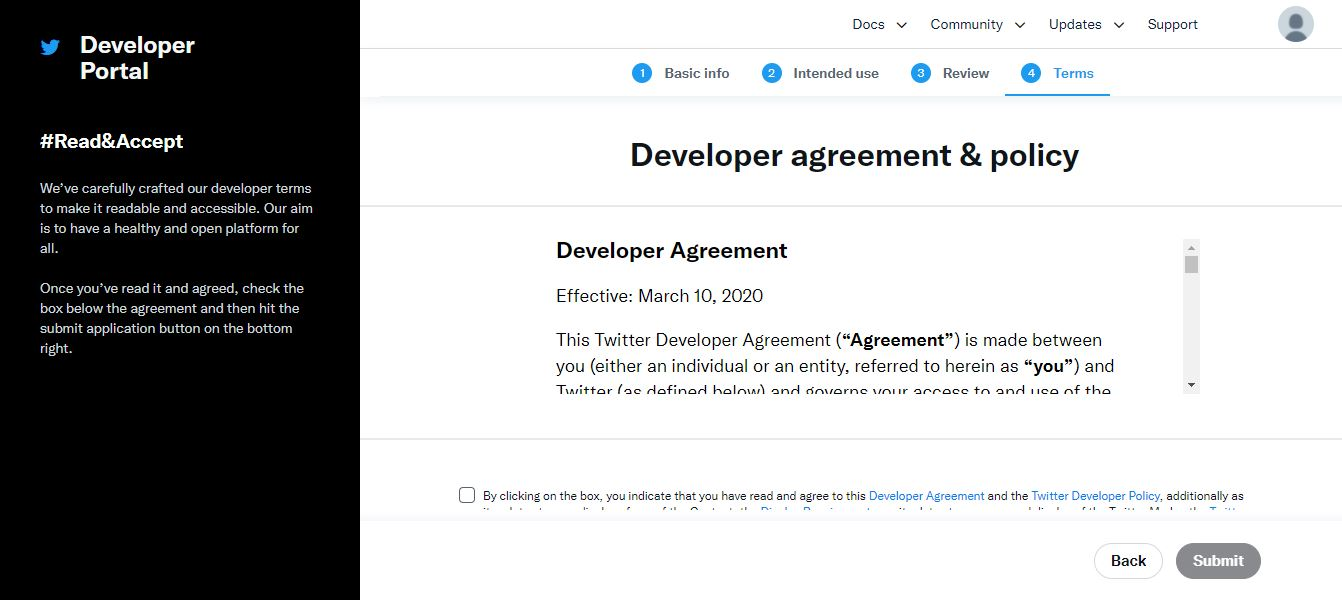

Comparirà adesso una schermata del genere:

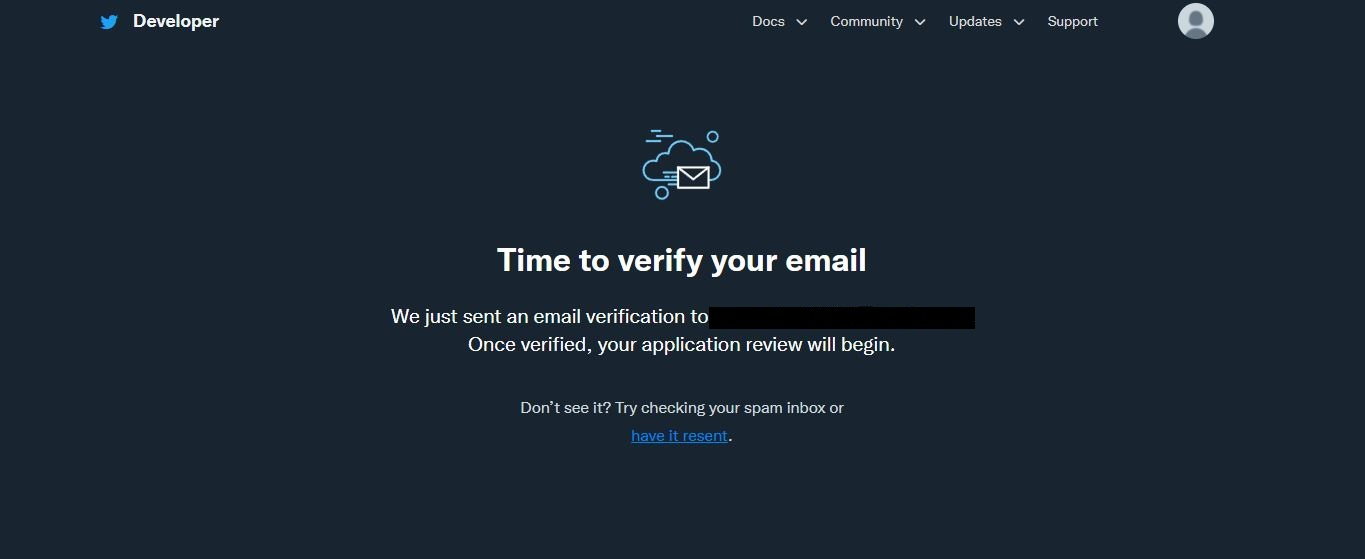

Verifichiamo la nostra email e avremo finito.

Arrivati a questo punto il nostro account developer dovrebbe essere pronto. Adesso cercando sempre "twitter developer" sul nostro motore di ricerca possiamo riandare nella pagina da dove siamo andati nella creazione del profilo con "apply" e ad accesso compiuto ora in alto a destra spunterà un bottone chiamato "developer portal".
Cliccandolo giungeremo alla Dashboard.

Sulla sinistra comparirà una sezione simile a questa. <br>
Cliccando su Project giungeremo a una sezione che ci farà creare un nuovo progetto
(possiamo vedere il progetto come un "apps" manager)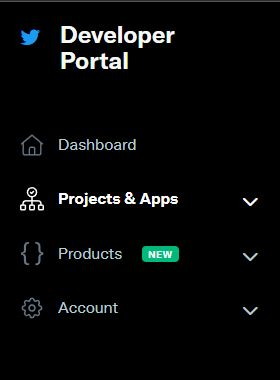

Saranno chieste di nuovo varie informazioni
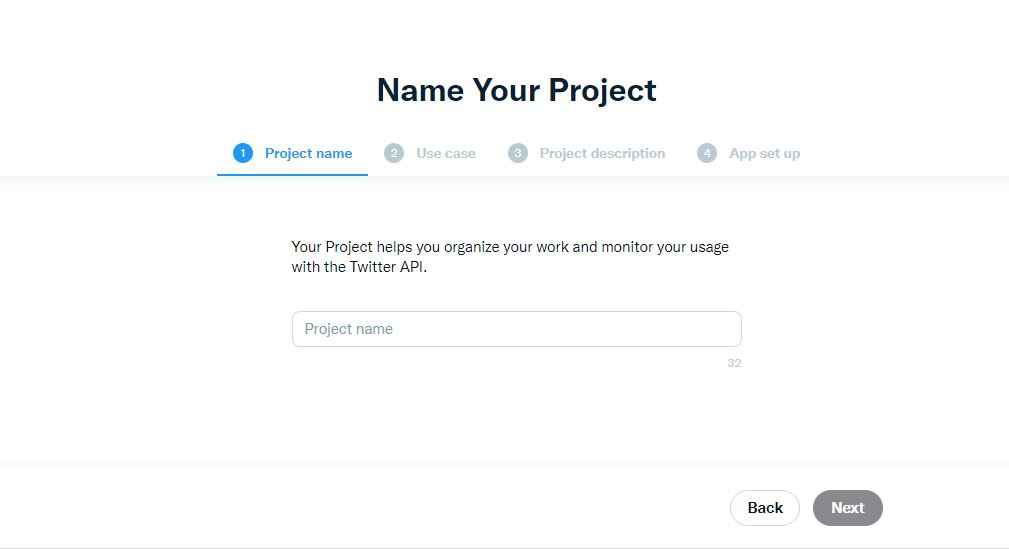

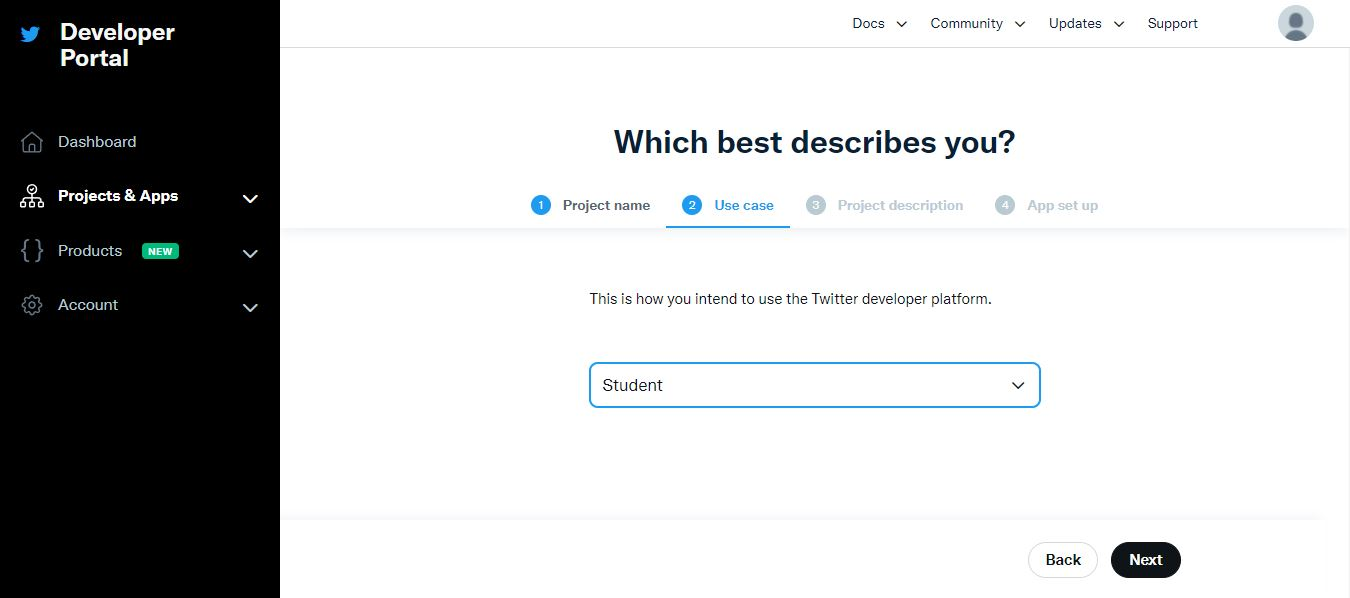

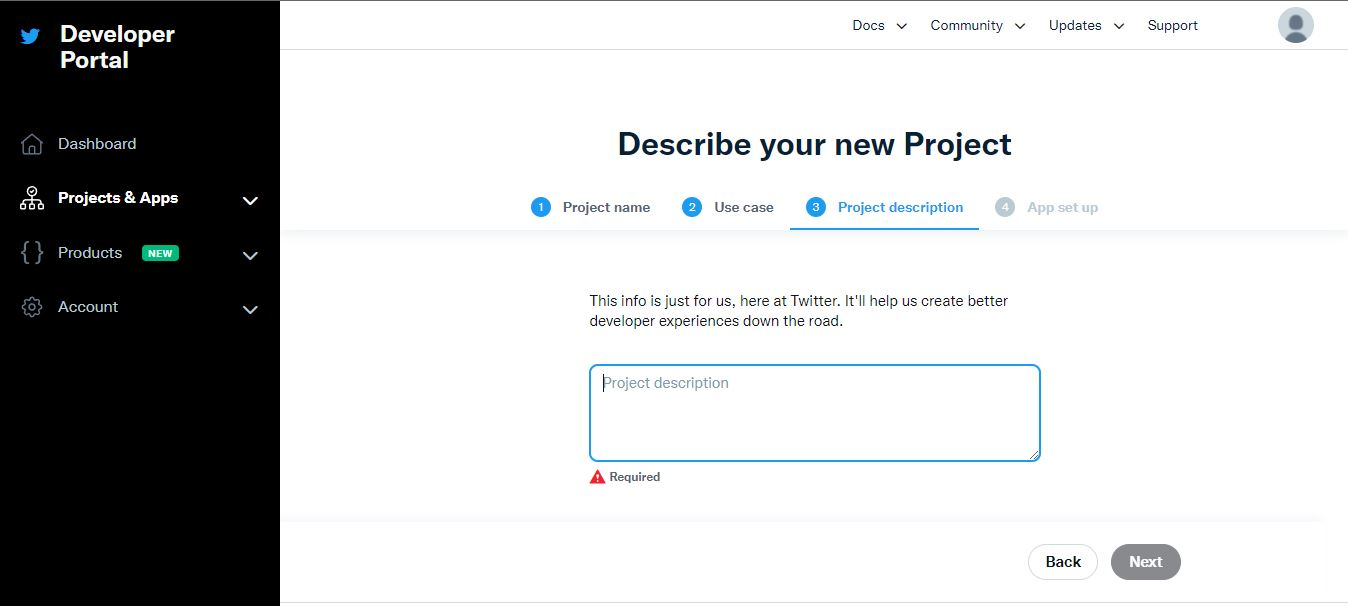

A questo punto si dovrà creare l'app: sarà richiesto inizialmente solo il nome e dopo di che saranno generati 2 keys e 1 token(il bearer token). Facciamo attenzione a salvarli perchè poi queste chiavi non verranno più mostrate in chiaro per motivi di sicurezza.
Andiamo a gestire le impostazioni della nostra app per poterci lavorare.
Possiamo gestire i dettagli come nome, descrizione e foto dell'app.
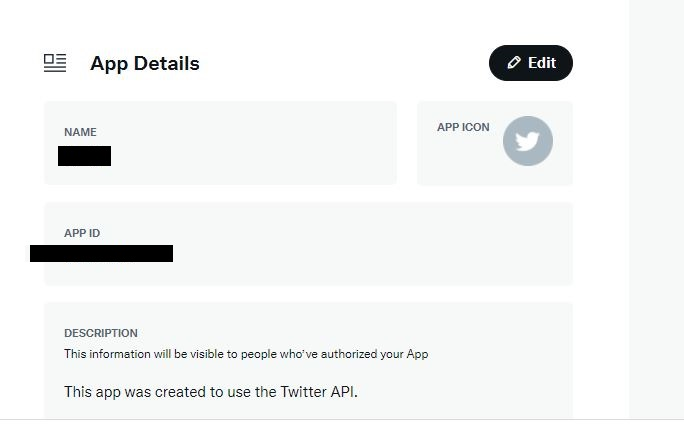

Sarà importante gestire i permessi della nostra applicazione e le impostazioni di autenticazione.
Come permessi possiamo mettere
1. Read
2. Read and write
3. Read and write and Direct message <br>
In base a cosa dovrà fare la nostra app scegliamo 1 delle 3. Per ora lasciamo stare "Read"
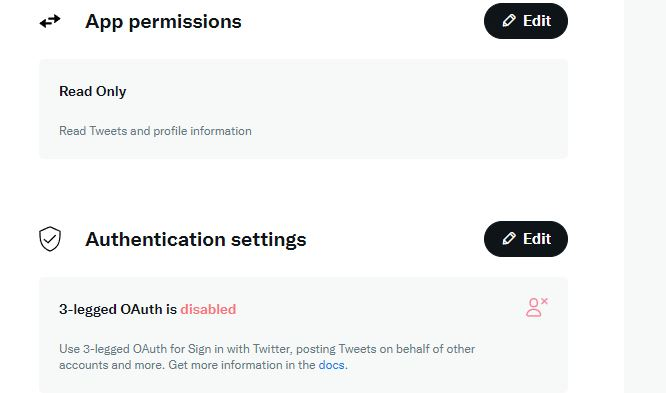

E' invece importantissimo gestire le impostazioni di autenticazione.
Attiviamo il 3-legged OAuth per poter accedere ai servizi delle API.
Saranno richieste ora 2 informazioni:
1. Callback URLs: ovvero l'url da usare per il protocollo(potremmo inserire https://localhost/8080 per lavorare in locale attualmente)
2. Nostro sito web(possiamo inserire anche un banale link a un nostro profilo social)
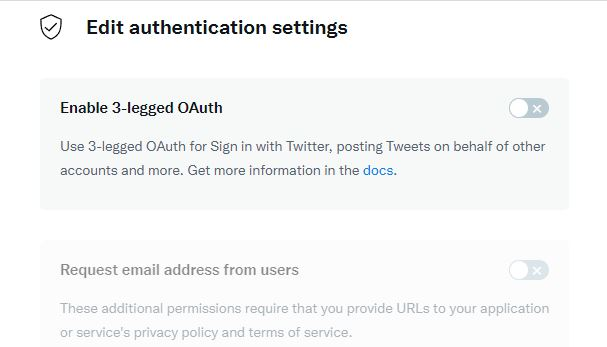

Adesso dovremo andare sempre dalla nostra app nella sezione "keys and tokens"
Procediamo con le generazione dell'access token and secret(consumer keys e bearer token vengono generati automaticamente alla creazione dell'app)
Facciamo ancora attenzione perchè anche questi token non verranno più mostrati in chiaro per motivi di sicurezza.
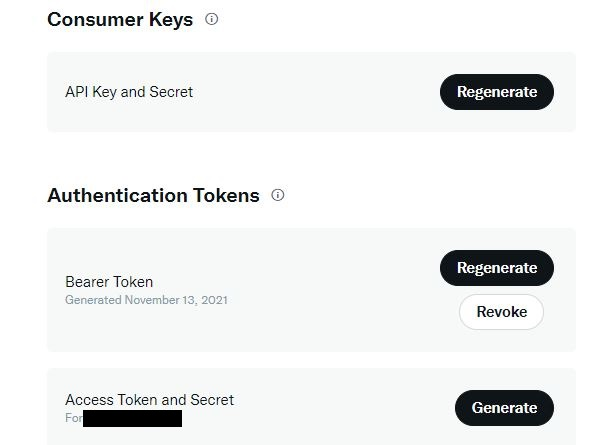

Arrivati a questo punto dovremmo essere in grado di utilizzare le API di twitter nei nostri codici.

Lavorando con OAuth 2 ovvero il servizio che usa Twitter per l'autenticazione/generazione di bearer token usiamo un codice simile a questo per effettuare appunto una richiesta per il nostro token.
Definiamo una funzione per ottenere il bearer token.

In [32]:
import requests
def OttieniBearerToken(apiKey, apiKeySecret):
    dati = {'grant_type': 'client_credentials'}
    endpoint = 'https://api.twitter.com/oauth2/token'
    risposta = requests.post(endpoint, data=dati, auth=(apiKey, apiKeySecret))
    return risposta.json()['access_token']

Definiamo ora la ottieniJSON che prende appunto un url per la richiesta e i parametri.
L'autenticazione la forniamo grazie alla funzione richiestaAuth.
Andiamo a controllare il codice di stato(se è andato tutto bene dovrebbe essere 200) e stampiamo il nostro json ricevuto come risposta.

In [33]:
import json

bearer_token = OttieniBearerToken('R2axAPh7Cctq2szNIcf3Mt9nH','VN0hDlPGhwty1a20FHnJ9SwQm0836pXEFR6dEZ2nJMZgF6Hpig')

def richiestaAuth(r):
    
    #headers http della nostra richiesta
    #inseriamo l'autorizzazione e il User-Agent che "dirà" al server cosa vogliamo fare
    #in questo caso chiediamo di fare una ricerca sui recenti con Python
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def ottieniJSON(url, params):
    #facciamo una richiesta inserendo l'url tipico per le azioni che vogliamo fare (esempio ...search/recent)
    #dobbiamo inserire gli headers http(lo facciamo con la funzione richiestaAuth)
    #inseriamo parametri per la nostra ricerca(ad esempio degli hashtags)
    risposta = requests.get(url, auth=richiestaAuth,params=params)
    if risposta.status_code != 200:
        raise Exception(risposta.status_code, risposta.text)
    return risposta.json()

In [34]:
search_url = "https://api.twitter.com/2/tweets/search/recent"
query_params = {'query': ' #football'} #con questi parametri(solo la query) troviamo post recenti con l'hashtag "football"
json_response = ottieniJSON(search_url,query_params)
print(json.dumps(json_response))

{"data": [{"id": "1461286980990472195", "text": "RT @play_knox: \ud83e\udd1d  @PSG_English strikes multi-year partnership with @gorillasapp \n\n\ud83d\udc49\ud83c\udffb Through this first global sport sponsorship, Gorillas\u2026"}, {"id": "1461286955249901572", "text": "Elwen Parbery bolsters women\u2019s team https://t.co/KnrS9Ykwkb #HeidelbergUnited #Football #NPLVIC"}, {"id": "1461286933649367043", "text": "Lionel #Messi est consid\u00e9r\u00e9 comme l\u2019un des plus grands joueurs de tous les temps\n#football \nLisez ici : https://t.co/Z3ZIwstlvs\n#TesYeuxSurLeMonde #AlainInfos"}, {"id": "1461286918977556483", "text": "Real Madrid rival Arsenal, Newcastle for Ajax fullback Mazraoui https://t.co/WhpGTRzBbr #football #news #sport https://t.co/7czysIH5iV"}, {"id": "1461286908533764102", "text": "Santos insists relationship with Man Utd striker Ronaldo rock solid: He was telling a Serbia player... https://t.co/ge00X4Y9PW #football #news #sport https://t.co/YciG3SW97Z"}, {"id": "14612

## I Wrapper
Nella pratica è solito usare dei wrapper ovvero delle librerie/oggetti che faranno il "lavoro sporco" per noi.
Noi penseremo solamente a dare i termini di autenticazione, nel nostro caso i 4 token di twitter.
Al bearer token che è l'entità più difficile da gestire ci penserà il wrapper.

Il wrapper ovvero la libreria chiamata twitter ci faciliterà le richieste, ad esempio ottenere l'autenticazione diventa una semplicissima chiamata a funzione dove inseriamo le nostre keys, al bearer token ci penserà il pacchetto.

Iniziamo ottenendo un oggetto di tipo twitter.api.Api con questa chiamata a funzione(contenuta nel pacchetto twitter)

In [137]:
import yaml

with open("psw.yml", "r") as stream:
    psw = yaml.safe_load(stream)

In [149]:
import twitter
api = twitter.Api(consumer_key=str(psw['consumer_key']),
                  consumer_secret=str(psw['consumer_secret']),
                  access_token_key=str(psw['access_token_key']),
                  access_token_secret=str(psw['access_token_secret']))
print(type(api))

<class 'twitter.api.Api'>


Con la chiamata GetUser possiamo ottenere un oggetto che contiene le informazioni su un utente, estrapoliamo nell'esempio l'utente di Cristiano Ronaldo e conserviamo in una variabile ID_CR il suo id

In [107]:
cristiano_ronaldo=api.GetUser(screen_name='@Cristiano')
ID_CR=cristiano_ronaldo.id

La GetUserTimeline(user) è utile per ottenere i post recenti di un utente

In [103]:
statuses = api.GetUserTimeline(ID_CR,count=1)
print([statuses[0]])
tweet=statuses[0];

[Status(ID=1459569995596374019, ScreenName=Cristiano, Created=Sat Nov 13 17:12:59 +0000 2021, Text='É por Portugal e pelos portugueses que queremos marcar, uma vez mais, presença no Campeonato do Mundo. E é com a fo… https://t.co/d96YnAcpgZ')]


Vediamo quante persone segue il nostro utente, la funzione GetFriendIDs intuitivamente ci torna una lista con gli ID delle persone seguite dall'utente

In [108]:
friendsCR=api.GetFriendIDs(user_id=ID_CR)
print(len(friendsCR))

60


La GetStatus ottiene un oggetto che contiene informazioni su un tweet con un certo id.

In [109]:
status=api.GetStatus(tweet.id) #ottieni tweet con un certo id

Nell'oggetto sono contenuti vari campi che caratterizzano il tweet, estraiamo ad esempio il numero di mi piace(in Twitter sono detti "favorites") e il numero di retweet.
Ci sono alcune informazioni estraibili tramite API solo avendo un account developer Premium Enterprise come ad esempio il reply_count che conteggia intuitivamente il numero di risposte che ha avuto il tweet.

In [110]:
print(status.favorite_count,status.retweet_count)

131581 8015


In [111]:
print(tweet.id)

1459569995596374019


Proviamo ad estrarre il reply_count usando una funzionalità di un altro pacchetto chiamato tweepy che permette di scorrere le risposte al tweet per conteggiarle una ad una in modo non troppo complicato. Però la chiamata potrebbe interrompersi se il tweet ha troppe risposte da conteggiare.

Bisogna fare attenzione al fatto che, come c'è scritto nelle docs., ci sono dei rate limit(per ogni 15 minuti) da rispettare. Superati questi limiti iniziamo ad avere degli errori. Anche una sola 'ispezione' a un tweet potrebbe darci problemi se i numeri sono grandi. <br>
Possiamo ottenere errori dovuti soprattutto al fatto che i calcoli sono fatti in "real time".

In [144]:
import tweepy

consumer_key=str(psw['consumer_key'])
consumer_secret=str(psw['consumer_secret'])
access_token_key=str(psw['access_token_key'])
access_token_secret=str(psw['access_token_secret'])

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
apiTweepy = tweepy.API(auth)

name = cristiano_ronaldo.screen_name

tweet_idINT = 1459112205652213772
tweet_idSTR = str(tweet_idINT)


repliesCR=0
try:
    for tweetT in tweepy.Cursor(apiTweepy.search_tweets,q='to:'+name, result_type='recent').items(1000):
        if hasattr(tweetT, 'in_reply_to_status_id_str'):
            if (tweetT.in_reply_to_status_id_str==tweet_idSTR):
                repliesCR = repliesCR + 1
    print(repliesCR)
except:
    print("Rate Limit dei 15 mins infranto.")

19


Il tweet di Cristiano Ronaldo ha numeri grandi. Proviamo ad eseguire lo stesso script però con un post con numeri più contenuti. Prendiamo un post di Matteo Salvini che sembra avere numeri ragionevoli( non è detto comunque funzioni, potremmo aver comunque infranto il rate limit con precedenti chiamate)

In [72]:
nameMS = 'matteosalvinimi'
tweet_idMS = '1460958935083634688'

repliesMS=0
try:
    for tweetT in tweepy.Cursor(apiTweepy.search_tweets,q='to:'+nameMS, result_type='recent').items(1000):
            if hasattr(tweetT, 'in_reply_to_status_id_str'):
                if (tweetT.in_reply_to_status_id_str==tweet_idMS):
                    repliesMS = repliesMS + 1
    print(repliesMS)
except:
    print("Rate Limit dei 15mins infranto.")

18


In conclusione per quanto riguarda il reply_count non è facile/possibile estrarre sempre informazioni usando le API. Un'altra tecnica sarebbe il web scraping che però risulta altrettanto difficoltoso in quanto quelle che ci da Twitter non sono pagine statiche HTML da cui estrarre facilmente informazioni ma sono degli script.
Usare beautifulSoup è quindi inutile, bisognerebbe usare altre librerie che in pratica aprono una vera e propria finestra di un browser per estrarre l'html dato in output al client il che rende tutto molto lento.

## Cerchiamo ora di fare una statistica.
### Raccogliamo da tweet recenti di Ronaldo 3 informazioni: il testo, il favorite_count e il retweet_count.
Dal testo proveremo a suddividere i tweet in 2 sottogruppi: tweet in cui Ronaldo parla della sua squadra(Manchester United o nazionale del Portogallo o Juventus) e tweet in cui non ne parla(quindi potrebbe parlare di se stesso, la sua famiglia sponsor ecc)
Suddivisi i tweet andremo a vedere i campi favorite_count e retweet_count per creare 2 medie per ognuno dei 2 sottogruppi.
Ottenute queste informazioni riusciremo a valutare se i suoi seguaci preferiscono uno dei 2 tipi di tweets all'altro o se il tipo di tweet è ininfluente(dunque le medie sarebbero circa uguali)


Usiamo la GetUserTimeline() per ottenere un campione di 200 post recenti del nostro utente

In [115]:
campione = api.GetUserTimeline(ID_CR,count=200)

In ogni istanza di campione ci sono molti campi: a noi interessano il text, il favorite_count e il retweet_count e anche gli hashtags in quanto potrebbe anche esserci un #ManchesterUnited ad esempio.
Definiamo una lista di stringhe,che se presenti, fanno intendere il post parli della squadra(potrebbe essere una tra Manchester United, Portogallo e Juventus):

In [116]:
#(la chiamiamo lTAS che sta per listTalkAboutSquad)
lTAS = ["🇵🇹","𝐏𝐎𝐑𝐓𝐔𝐆𝐀𝐋" ,"seleção", "vamoscomtudo", "VamosComTudo" , "EQUIPA" , "equipa" ,
        "Man. United","Old Trafford","𝑴𝒂𝒏. 𝑼𝒏𝒊𝒕𝒆𝒅","RED DEVILS" "🔴⚪️⚫️","🔴⚫️", "mufc" ,"MUFC", "Manchester United",
        "MANCHESTER UNITED","MAN. UNITED",
        "FINO ALLA FINE","🏳️🏴", "𝑭𝒊𝒏𝒐 𝑨𝒍𝒍𝒂 𝑭𝒊𝒏𝒆", "Juve","JUVENTUS","Juventus","juve",
        "juventus" ,"Winning team","Vittoria", "Fino Alla Fine",
        "finoallafine","FINOALLAFINE","FinoAllaFine"]
length = len(lTAS)
print(length)

31


L'oggetto dato in output dalla GetStatus ha un attributo chiamato "Hashtags" da cui vogliamo estrarre gli hashtags del tweet.

In [117]:
idPostEsempio = 1355599316300292097
post = api.GetStatus(idPostEsempio)
print(type(post.hashtags[0]))
print(post.hashtags[0].text)

<class 'twitter.models.Hashtag'>
finoallafine


Come si vede, da un oggetto di tipo hashtag è facilmente estraibile la parte testuale che è quella che ci interessa.
Andiamo a suddividere il nostro campione in 2 sottoinsiemi.

In [118]:
Tweet_squad = []
Tweet_Nosquad = []

for tweet in campione:
    aggiuntoATweetSquad = False
    
    #vediamo se almeno una parola della nostra lista sta nel text
    for parola in lTAS:
        if parola in tweet.text:
            Tweet_squad.append(tweet)
            aggiuntoATweetSquad = True
            break
            
    #vediamo se almeno una parola della nostra lista sta tra gli hashtags del tweet
    #usiamo il primo if per evitare di inserire 2 volte nella lista squad un tweet
    #in cui nel testo si parla della squadra e che contiene anche hashtags che fanno
    #match con la nostra lista
    if aggiuntoATweetSquad == False:
        for hashtag in tweet.hashtags:
            for parola in lTAS:
                if parola in hashtag.text:
                    Tweet_squad.append(tweet)
                    aggiuntoATweetSquad = True
                    break
    #se il valore è false vuol dire che il tweet non è stato aggiunto nella lista squad quindi va aggiunto nella seconda lista
    if aggiuntoATweetSquad == False:
        Tweet_Nosquad.append(tweet)
        
print(len(Tweet_squad))
print(len(Tweet_Nosquad))

69
131


Adesso facciamo la somma di tutti i favorite_count e retweet_count dei 2 sottogruppi e facciamo le medie per ogni tweet.

In [119]:
somma_FS = 0
somma_RS = 0
for t in Tweet_squad:
    somma_FS = somma_FS + t.favorite_count
    somma_RS = somma_RS + t.retweet_count
media_FS = somma_FS/(len(Tweet_squad))
media_RS = somma_RS/(len(Tweet_squad))
print("Un post che parla della squadra ha circa: " + str(media_FS) + " likes e " + str(media_RS) + " retweets")

Un post che parla della squadra ha circa: 217855.34782608695 likes e 13360.536231884058 retweets


In [120]:
somma_FNS = 0
somma_RNS = 0
for t in Tweet_Nosquad:
    somma_FNS = somma_FNS + t.favorite_count
    somma_RNS = somma_RNS + t.retweet_count
media_FNS = somma_FNS/(len(Tweet_Nosquad))
media_RNS = somma_RNS/(len(Tweet_Nosquad))
print("Un post che NON parla della squadra ha circa: " + str(media_FNS) + " likes e " + str(media_RNS) + " retweets")

Un post che NON parla della squadra ha circa: 243093.6183206107 likes e 13459.862595419847 retweets


Disegniamo alcuni grafici per mostrare se ci sono differenze grandi tra le varie medie
1. Media_FS indica la media dei like in un tweet di tipo Squad
2. Media_RS indica la media dei retweet in un tweet di tipo Squad
3. Media_FNS indica la media dei like in un tweet di tipo NoSquad
4. Media_RNS indica la media dei retweet in un tweet di tipo NoSquad

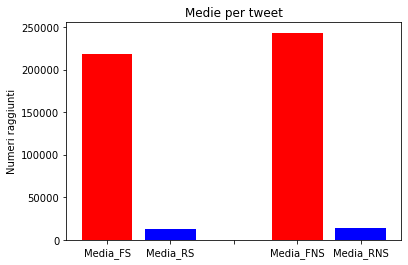

In [121]:
import matplotlib.pyplot as plt
import numpy as np
medie = ["Media_FS", "Media_RS","", "Media_FNS", "Media_RNS"]
valori = [media_FS , media_RS ,0, media_FNS , media_RNS]
x_pos = np.arange(len(valori))
plt.bar(x_pos, valori, align='center',color=["red" , "blue" ,"white", "red" , "blue"])
#la stringa vuota, lo 0 e il "white" sono usati solo per creare un pò di spazio
plt.xticks(x_pos, medie)
plt.ylabel('Numeri raggiunti')
plt.title('Medie per tweet')
plt.show()

Grafici a torta per mostrare le differenze tra le varie medie


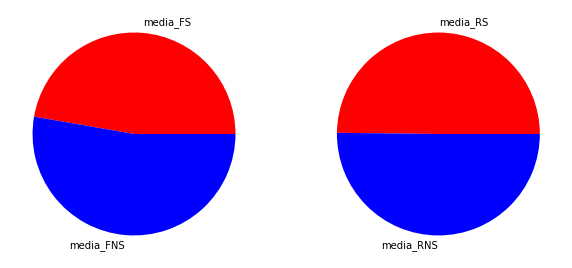

In [122]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

lista_fav = [media_FS , media_FNS]
label1 = ["media_FS","media_FNS"]
ax1.pie(lista_fav, labels=label1,colors=["red","blue"])

lista_r = [media_RS , media_RNS]
label2 = ["media_RS","media_RNS"]
ax2.pie(lista_r, labels=label2,colors=["red","blue"])

print("Grafici a torta per mostrare le differenze tra le varie medie")

Dai dati che otteniamo dalle medie potremmo dire che effettivamente i seguaci di Ronaldo non sono molto influenzati dal tipo di tweet dell'utente, sembrano sempre apprezzare le sue attività.

## Visualizziamo alcuni istogrammi 
Come primi vediamo 2 istogrammi del campione(ovvero senza distinguere tra tweet di tipo squad e no_squad)

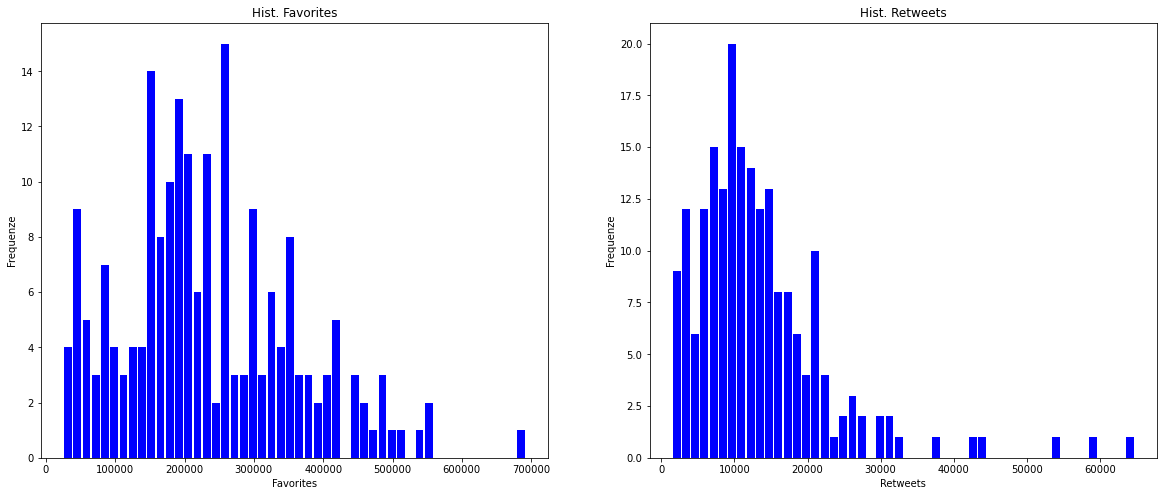

In [123]:
import matplotlib.pyplot as plt

favCampione = [] #serve per hist dei favorite_count
retCampione = [] #serve per hist dei retweet

for t in campione:
    favCampione.append(t.favorite_count)
    retCampione.append(t.retweet_count)
    
fig, (h1,h2) = plt.subplots(1,2,figsize=(20,8))
h1.hist(favCampione,color='blue',rwidth=0.85,bins=int(len(campione)/4))
h2.hist(retCampione,color='blue',rwidth=0.85,bins=int(len(campione)/4))

h1.set_title('Hist. Favorites')
h1.set_xlabel('Favorites')
h1.set_ylabel('Frequenze')

h2.set_title('Hist. Retweets')
h2.set_xlabel('Retweets')
h2.set_ylabel('Frequenze')
plt.show()

Si vede effettivamente grazie all'istogramma quali sono i numeri più frequenti. (In realtà non abbiamo 200 valori in quanto abbiamo impostato i bins a 50). <br>
Dall'istogramma dei favorite_count sembra non abbiamo ricavato nessuna informazione, invece dall'istogramma dei retweet si intravede(in modo comunque approssimato) una sorta di campana. <br>
Proviamo adesso a disegnare gli istogrammi però dei 2 sottoinsiemi separati Tweet_squad e Tweet_Nosquad per cercare qualche differenza.

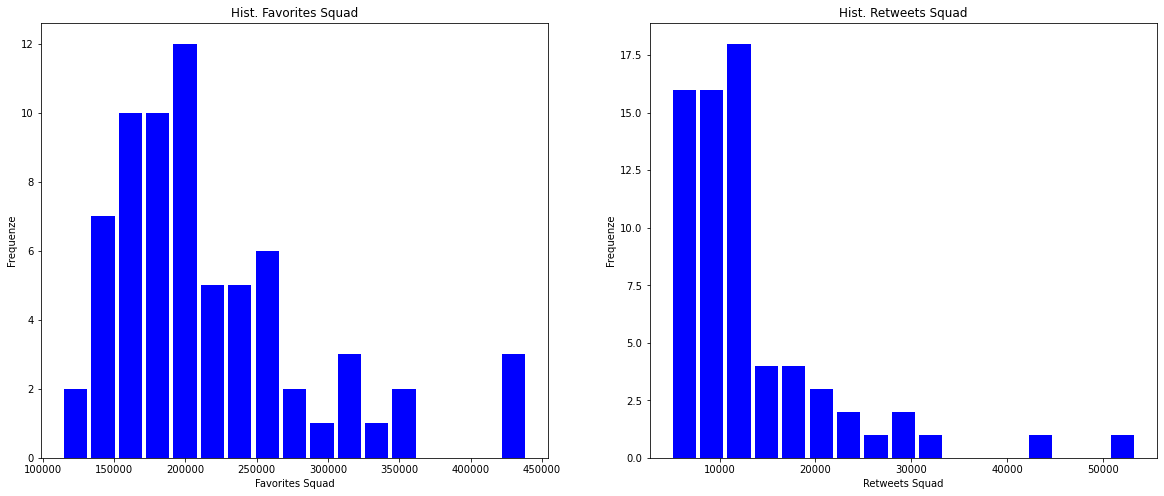

In [124]:
favSquad = [] #serve per hist dei favorite_count
retSquad = [] #serve per hist dei retweet

for t in Tweet_squad:
    favSquad.append(t.favorite_count)
    retSquad.append(t.retweet_count)
    
fig, (h1,h2) = plt.subplots(1,2,figsize=(20,8))
n1,b1,p1 = h1.hist(favSquad,color='blue',rwidth=0.85,bins=int(len(Tweet_squad)/4))
n2,b2,p2 = h2.hist(retSquad,color='blue',rwidth=0.85,bins=int(len(Tweet_squad)/4))

h1.set_title('Hist. Favorites Squad')
h1.set_xlabel('Favorites Squad')
h1.set_ylabel('Frequenze')

h2.set_title('Hist. Retweets Squad')
h2.set_xlabel('Retweets Squad')
h2.set_ylabel('Frequenze')
plt.show()

valore_piu_frequente_squad = b1[np.where(n1== n1.max())]
#seleziona il bin con y massima e ne da il valore

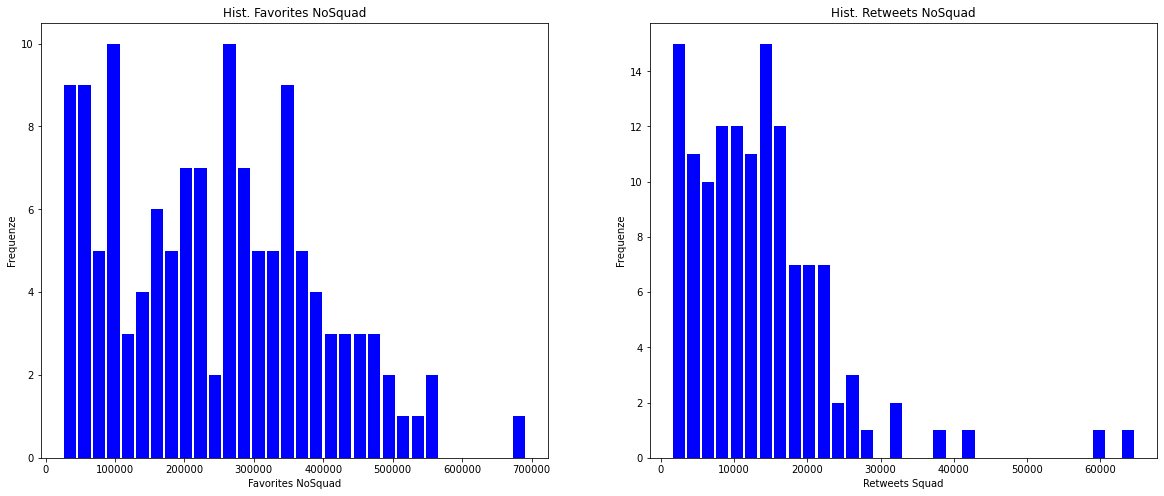

In [125]:
favNoSquad = [] #serve per hist dei favorite_count
retNoSquad = [] #serve per hist dei retweet

for t in Tweet_Nosquad:
    favNoSquad.append(t.favorite_count)
    retNoSquad.append(t.retweet_count)
    
fig, (h1,h2) = plt.subplots(1,2,figsize=(20,8))
n1,b1,p1 = h1.hist(favNoSquad,color='blue',rwidth=0.85,bins=int(len(Tweet_Nosquad)/4))
n2,b2,p2 = h2.hist(retNoSquad,color='blue',rwidth=0.85,bins=int(len(Tweet_Nosquad)/4))

h1.set_title('Hist. Favorites NoSquad')
h1.set_xlabel('Favorites NoSquad')
h1.set_ylabel('Frequenze')

h2.set_title('Hist. Retweets NoSquad')
h2.set_xlabel('Retweets Squad')
h2.set_ylabel('Frequenze')
plt.show()

valore_piu_frequente_Nosquad = b1[np.where(n1== n1.max())]
#seleziona il bin con y massima e ne da il valore

Dati gli istogrammi; sembrano non esserci evidenti differenze nelle frequenze dei retweet tra tweet di tipo squad e di tipo Nosquad mentre invece salta all'occhio una differenza tra gli istogrammi del campo favorite_count. <br>
Vediamo infatti la differenza tra il valore più frequente nell'istogramma squad e il valore più frequente nell'istogramma Nosquad

In [126]:
print(str(valore_piu_frequente_squad) + ' ' + str(valore_piu_frequente_Nosquad))
#se vengono stampati più valori per una delle 2 variabili(o anche entrambe) significa che ci sono appunto più
# valori(nel caso che i bins siano meno del numero di elementi non sono valori ma insiemi di valori) 
#che condividono la frequenza massima nell'istogramma

[190235.58823529] [ 87644.9375 254463.4375]


Vediamo adesso di creare un grafico che mostra numeri di favorite e retweet in funzione delle date dei tweet per vedere se c'è un andamento particolare dei numeri in base al tempo.

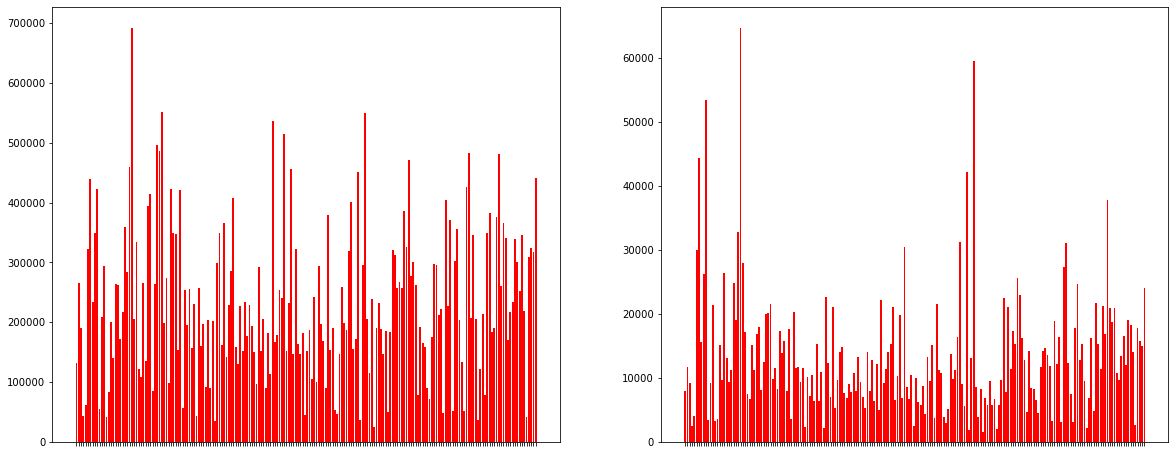

In [136]:
from datetime import datetime

tweet_ordinati_per_data = sorted(campione, key=lambda x: datetime.
                 strftime(datetime.strptime(x.created_at,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S') , reverse=True)
date = []
favs = []
ret = []
for t in tweet_ordinati_per_data:
    date.append(datetime.
                 strftime(datetime.strptime(t.created_at,'%a %b %d %H:%M:%S +0000 %Y'), '%Y-%m-%d %H:%M:%S'))
    favs.append(t.favorite_count)
    ret.append(t.retweet_count)
    
fig, (bar1,bar2) = plt.subplots(1,2,figsize=(20,8))
width=0.8

bar1.bar(date,favs,width,color='r')
bar2.bar(date,ret,width,color='r')

bar1.set_xticklabels([])
bar2.set_xticklabels([])
plt.show()

Dai 2 grafici non sembra esserci un andamento particolare dei numeri di favorites e retweets basati sul tempo. <br>
Questo perchè effettivamente il nostro utene è famoso già da tempo, quindi ha numeri già affermati. <br>
Potremmo notare  un andamento a salire della frequenza in funzione del tempo se prendessimo ad esempio un utente che negli ultimi tempi ha avuto una crescita di di follower importante. <br>
Da notare che i grafici sembrano quasi "sovrapporsi" in qualche punto. Sembra quindi che se in un tweet c'è un valore alto(basso) di favorite ci sarà anche un valore alto(basso) di retweet. <br>
Per studiare meglio questo aspetto calcoliamo il coefficiente di correlazione.

## Correlazione tra favorite_count e retweet_count
 Vediamo ora se il favorite_count e il retweet_count sono correlate secondo il coefficiente di Pearson(lo vediamo nuovamente  per tutto il campione e per i sottoinsieme separati)

In [128]:
def coefficienteAttendibile(c):
    if c >= 0.8:
        print("Il coefficiente supera 0.8, si può considerare attendibile")
    elif c <= -0.8:
        print("Il coefficiente è meno di -0.8, si può considerare attendibile")
    else:
        print("Il coefficiente ha valore (assolutamente) basse, è inattendibile")

In [150]:
coeffCampione = np.corrcoef(favCampione,retCampione) 
#restituisce una matrice 2*2 dove nella principale ci sono i coefficienti tra favCampione e retCampione con
# se stessi(quindi il valore è 1). Nella secondaria invece ci sarà il coefficiente tra favCampione e retCampione

print("Il coefficiente di Pearson tra favCampione e retCampione è: "+str(coeffCampione[0,1]))
coefficienteAttendibile(coeffCampione[0,1])

coeffSquad = np.corrcoef(favSquad,retSquad)
print("Il coefficiente di Pearson tra favSquad e retSquad è: "+str(coeffSquad[0,1]))
coefficienteAttendibile(coeffSquad[0,1])

coeffNoSquad = np.corrcoef(favNoSquad,retNoSquad)
print("Il coefficiente di Pearson tra favNoSquad e retNoSquad è: "+str(coeffNoSquad[0,1]))
coefficienteAttendibile(coeffNoSquad[0,1])

lista_coeff = [coeffNoSquad[0,1],coeffCampione[0,1],coeffSquad[0,1]]
if max(lista_coeff) == coeffNoSquad[0,1]:
    print("Sembra che il coefficiente di Pearson più alto si veda nei tweet di tipo NoSquad")
elif max(lista_coeff) == coeffSquad[0,1]:
    print("Sembra che il coefficiente di Pearson più alto si veda nei tweet di tipo Squad")
elif max(lista_coeff) == coeffCampione[0,1]:
    print("Sembra che il coefficiente di Pearson più alto si veda nel campione intero")


Il coefficiente di Pearson tra favCampione e retCampione è: 0.8080711794024653
Il coefficiente supera 0.8, si può considerare attendibile
Il coefficiente di Pearson tra favSquad e retSquad è: 0.8737712260426396
Il coefficiente supera 0.8, si può considerare attendibile
Il coefficiente di Pearson tra favNoSquad e retNoSquad è: 0.8241535339730068
Il coefficiente supera 0.8, si può considerare attendibile
Sembra che il coefficiente di Pearson più alto si veda nei tweet di tipo Squad


# Conclusioni
L'uso delle API di Twitter può essere molto difficoltoso ma l'esistenza dei Wrapper ci facilita la vita.
Abbiamo visto che non sempre tutto è possibile con le API (ad esempio esiste il rate_limit nei 15 minuti)
Twitter si rivela un ottimo social media per estrarre informazioni riguardanti soprattutto persone famose che siano politici, calciatori, attori ecc.
Nel tutorial abbiamo usato un modo molto grezzo per valutare se un tweet fosse un tweet che parlasse della squadra o no in quanto effettivamente il problema da risolvere non è difficoltoso(quando Ronaldo parla della squadra inserisce praticamente sempre una delle stringhe in lTAS). <br>
Se ci imbattessimo in un problema più difficoltoso(più di 2 etichette,tweet meno strutturati, informazioni date in maniera meno chiara ecc...) potremmo usare algoritmi di classificazione veri e propri per appunto attribuire delle etichette ai nostri tweet in maniera più precisa.